In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Working with perfectly Linear Data

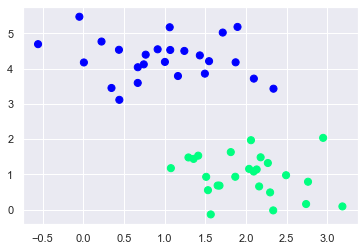

In [19]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

plt.scatter(x[:,0],x[:,1],c=y,s=50, cmap='winter')

In [25]:
from sklearn.svm import SVC
model=SVC(kernel='linear', C=1)
model.fit(x,y)

SVC(C=1, kernel='linear')

In [46]:
def plot_svc_decision_function(model,ax=None, plot_support=True):
    """plot a decision functionfor a 2D SVC"""
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    #create grid to evaluate model
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
                
    #plot decision boundary and margins
    ax.contour(X,Y,P, colors='k',levels=[-1,0,1],alpha=0.5,linestyle=['--','-','--'])
                 
    #plot supprot vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,linewidth=1,facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14500\359505026.py:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(X,Y,P, colors='k',levels=[-1,0,1],alpha=0.5,linestyle=['--','-','--'])


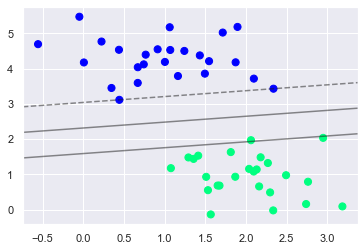

In [47]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='winter')
plot_svc_decision_function(model)

# The importance of support vectors

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14500\359505026.py:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(X,Y,P, colors='k',levels=[-1,0,1],alpha=0.5,linestyle=['--','-','--'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14500\359505026.py:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(X,Y,P, colors='k',levels=[-1,0,1],alpha=0.5,linestyle=['--','-','--'])


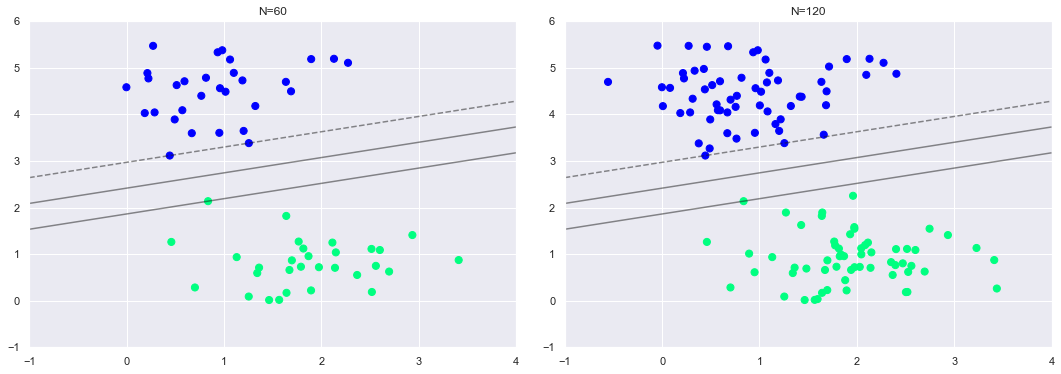

In [51]:
def plot_svm(N=10,ax=None):
    x,y=make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.60)
    
    x=x[:N]
    y=y[:N]
    model=SVC(kernel='linear',C=1E10)
    model.fit(x,y)
    
    ax=ax or plt.gca()
    ax.scatter(x[:,0],x[:,1],c=y,s=50,cmap='winter')
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svc_decision_function(model,ax)
    
fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95,wspace=0.1)
for axi, N in zip(ax,[60,120]):
    plot_svm(N,axi)
    axi.set_title('N={0}'.format(N))

# workingg with almost Linearly seperable dataset

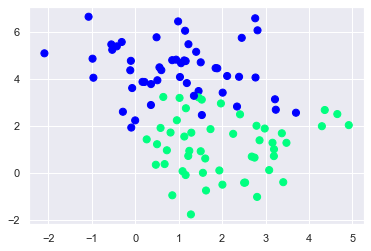

In [53]:
x,y=make_blobs(n_samples=100,centers=2,random_state=0, cluster_std=1.2)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='winter')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14500\359505026.py:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(X,Y,P, colors='k',levels=[-1,0,1],alpha=0.5,linestyle=['--','-','--'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14500\359505026.py:16: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(X,Y,P, colors='k',levels=[-1,0,1],alpha=0.5,linestyle=['--','-','--'])


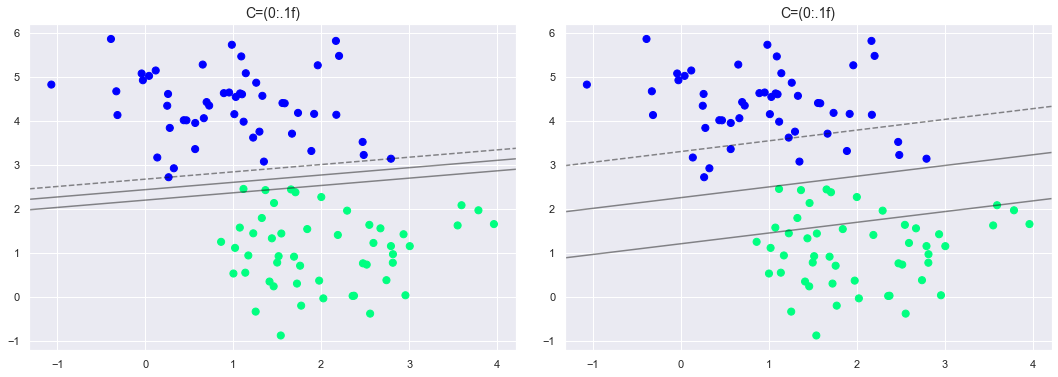

In [60]:
x,y=make_blobs(n_samples=100,centers=2,random_state=0, cluster_std=0.8)
fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95,wspace=0.1)

for axi, C in zip(ax, [10.0,0.1]):
    model=SVC(kernel='linear',C=C).fit(x,y)
    axi.scatter(x[:,0],x[:,1],c=y,s=50,cmap='winter')
    plot_svc_decision_function(model,axi)
    axi.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,lw=1,facecolors='none');
    axi.set_title('C=(0:.1f)'.format(C),size=14)